In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from math import pi, sqrt, exp

In [0]:
def loadImage(image):
  img = cv2.imread(image,0)
  return img

In [0]:
def gaussian(n,sigma):
  limit = range(-int(n/2),int(n/2)+1)
  value = [(exp(-(float(x/sigma)**2)/2) / (sigma * sqrt(2*pi))) for x in limit]
  k = np.outer(value,value)
  #print (k)
  return k
	


In [0]:
def padding(arr,top,bottom,left,right):
  xlen = arr.shape[0]+2*left
  ylen = arr.shape[1]+2*top
  new = np.zeros([xlen,ylen],dtype=int)
  new[left:arr.shape[0]+left,top:arr.shape[1]+top] = arr
  new1 = np.array(new)
  #print(new1)
  return new1

In [0]:
def convol(arr,kernel):
  top = bottom = (kernel.shape[1] // 2)
  left = right = (kernel.shape[0] // 2)
  newImg = padding(arr,top,bottom,left,right)
  result = np.zeros_like(arr)
  offset_x,offset_y = kernel.shape[1],kernel.shape[0]
  for x in range(arr.shape[1]):
    for y in range(arr.shape[0]): 
      result[y, x]=(kernel * newImg[y: y+offset_y, x: x+offset_x]).sum()
      
      
  return result


In [0]:
def threshold(newImg):
  high_thresh = 255
  low_thresh = 0
  for x in range(newImg.shape[1]):
    for y in range(newImg.shape[0]): 
      if newImg[y,x]>= high_thresh:
        newImg[y,x] = high_thresh
      elif newImg[y,x] < low_thresh:
        newImg[y,x] = 0
      # else:
      #   newImg[y,x] = int(newImg[y,x])
      
  return newImg 

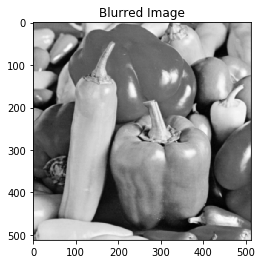

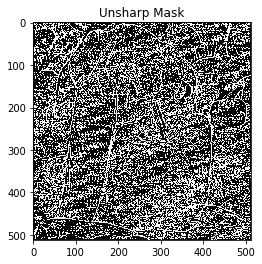

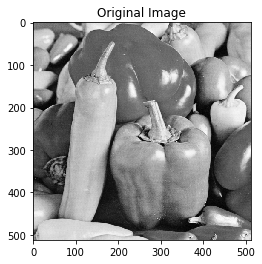

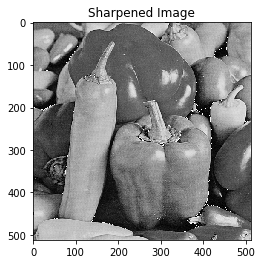

In [7]:
arrImg = loadImage('image_3.png')

kernel = gaussian(7,1)
conImg = convol(arrImg,kernel)

plt.title('Blurred Image')
plt.imshow(conImg, cmap='gray')
plt.show()

highpass = arrImg - conImg
highpass = threshold(highpass)

plt.title('Unsharp Mask')
plt.imshow(highpass, cmap='gray')
plt.show()

plt.title('Original Image')
plt.imshow(arrImg, cmap='gray')
plt.show()

sharpen =  arrImg + highpass 
plt.title('Sharpened Image')
plt.imshow(sharpen, cmap='gray')
plt.show()


